In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
num_train = 15000       # 60000 for full data set 
num_test  = 2500        # 10000 for full data set

txt_out_file_path = 'svm-parameter-tuning-log.txt'
def print_to_txt_file(*s):
    with open(txt_out_file_path, 'a') as f:
        for arg in s:
            print(arg, file=f)
            print(arg)

In [3]:
# Fetch Data automatically
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Display (Train) (Test) datasets
print("X : Dataset Trainingset")
print(X_train.shape, X_test.shape)
print("Y : Dataset Trainingset")
print(y_train.shape, y_test.shape)

X : Dataset Trainingset
(60000, 28, 28) (10000, 28, 28)
Y : Dataset Trainingset
(60000,) (10000,)


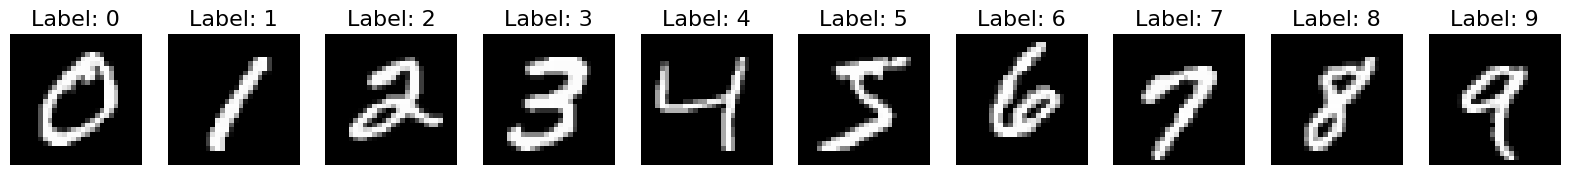

In [5]:
num_classes = 10 # 0 .. 9
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  ax[i].axis('off')

In [6]:
train_data = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
train_label = y_train.astype("float32")

test_data = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
test_label = y_test.astype("float32")

In [7]:
train_data = train_data / 255
test_data = test_data / 255

In [8]:
train_label = keras.utils.to_categorical(train_label, num_classes)
test_label = keras.utils.to_categorical(test_label, num_classes)

In [9]:
train_data = train_data[1:num_train,]
train_label = train_label[1:num_train]

test_data = test_data[1:num_test,]
test_label = test_label[1:num_test]

In [10]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [11]:
batch_size = 512
epochs=10
model.fit(x=train_data, y=train_label, batch_size=batch_size, epochs=epochs)

Epoch 1/10
30/30 [==============================] - 1s 5ms/step - loss: 1.2741 - accuracy: 0.6336
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4572 - accuracy: 0.8658
Epoch 3/10
30/30 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.9043
Epoch 4/10
30/30 [==============================] - 0s 5ms/step - loss: 0.2800 - accuracy: 0.9210
Epoch 5/10
30/30 [==============================] - 0s 5ms/step - loss: 0.2439 - accuracy: 0.9306
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 0.2117 - accuracy: 0.9416
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1858 - accuracy: 0.9458
Epoch 8/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1660 - accuracy: 0.9535
Epoch 9/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1520 - accuracy: 0.9563
Epoch 10/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1338 - accuracy: 0.9623


In [12]:
test_loss, test_acc = model.evaluate(test_data, test_label)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9284
Test Loss: 0.21871724724769592, Test Accuracy: 0.9283713698387146


In [13]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

79/79 [==============================] - 0s 1ms/step
[[4.3123437e-05 1.3066978e-03 9.9688834e-01 ... 5.0003359e-07
  2.7377316e-04 2.9596624e-08]
 [1.0399484e-04 9.8585874e-01 3.0480030e-03 ... 2.8598066e-03
  2.7228752e-03 1.6732974e-04]
 [9.9974638e-01 3.9988072e-07 6.3900341e-05 ... 6.7989808e-06
  8.8402185e-06 7.7132936e-05]
 ...
 [9.2873944e-07 2.8183074e-06 1.0246723e-06 ... 2.3780798e-05
  4.4053467e-03 9.2290515e-01]
 [1.7490049e-05 2.3351835e-05 8.9093272e-05 ... 8.5010927e-04
  6.5172929e-04 2.7065564e-02]
 [2.3626164e-06 1.3231034e-05 6.1769169e-05 ... 1.4712987e-04
  5.3539614e-05 1.1405392e-03]]
[2 1 0 ... 9 4 4]


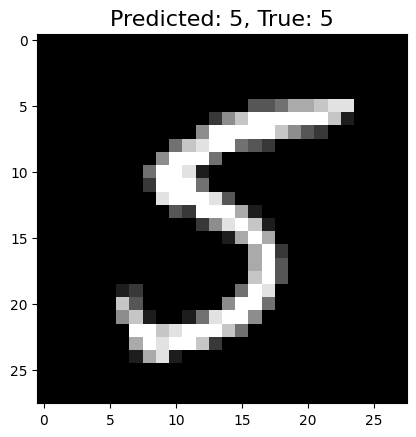

In [14]:
# Single Example
random_idx = np.random.choice(len(test_data))
x_sample = test_data[random_idx]
y_true = np.argmax(test_label, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

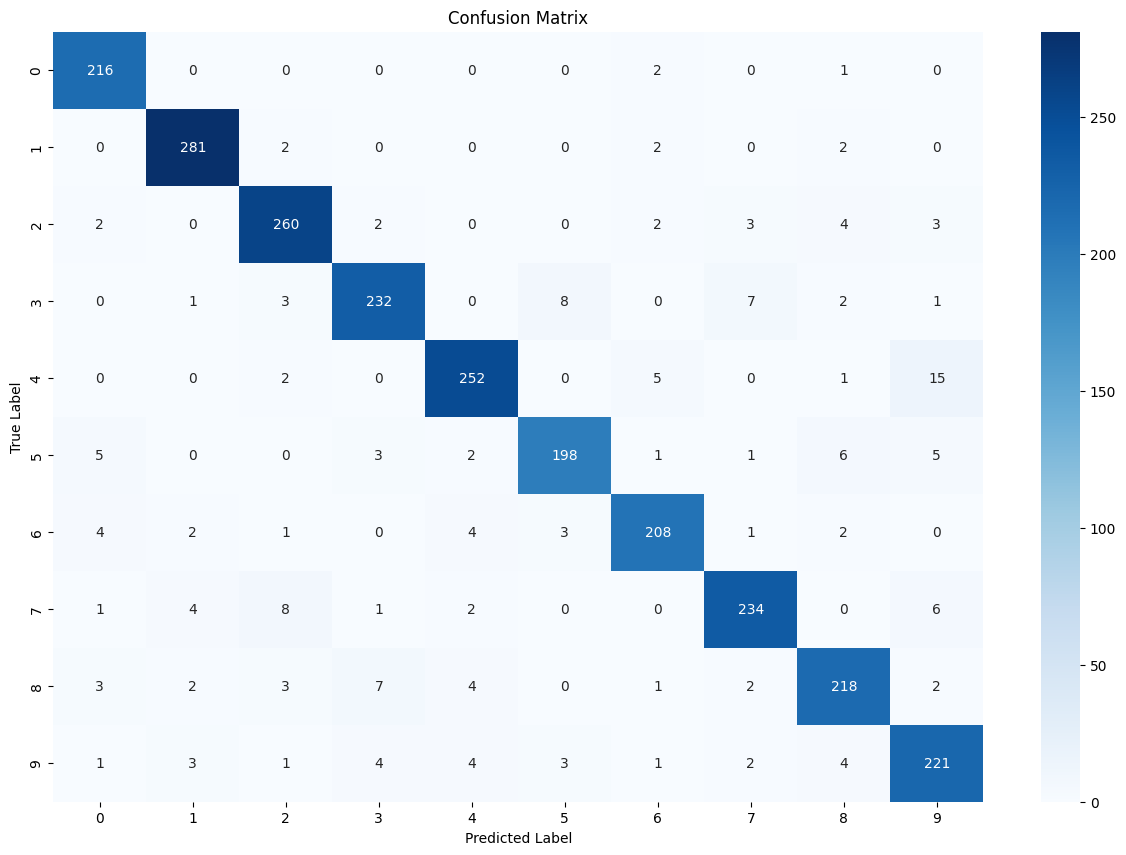

In [15]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [16]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = test_data[errors]

In [17]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

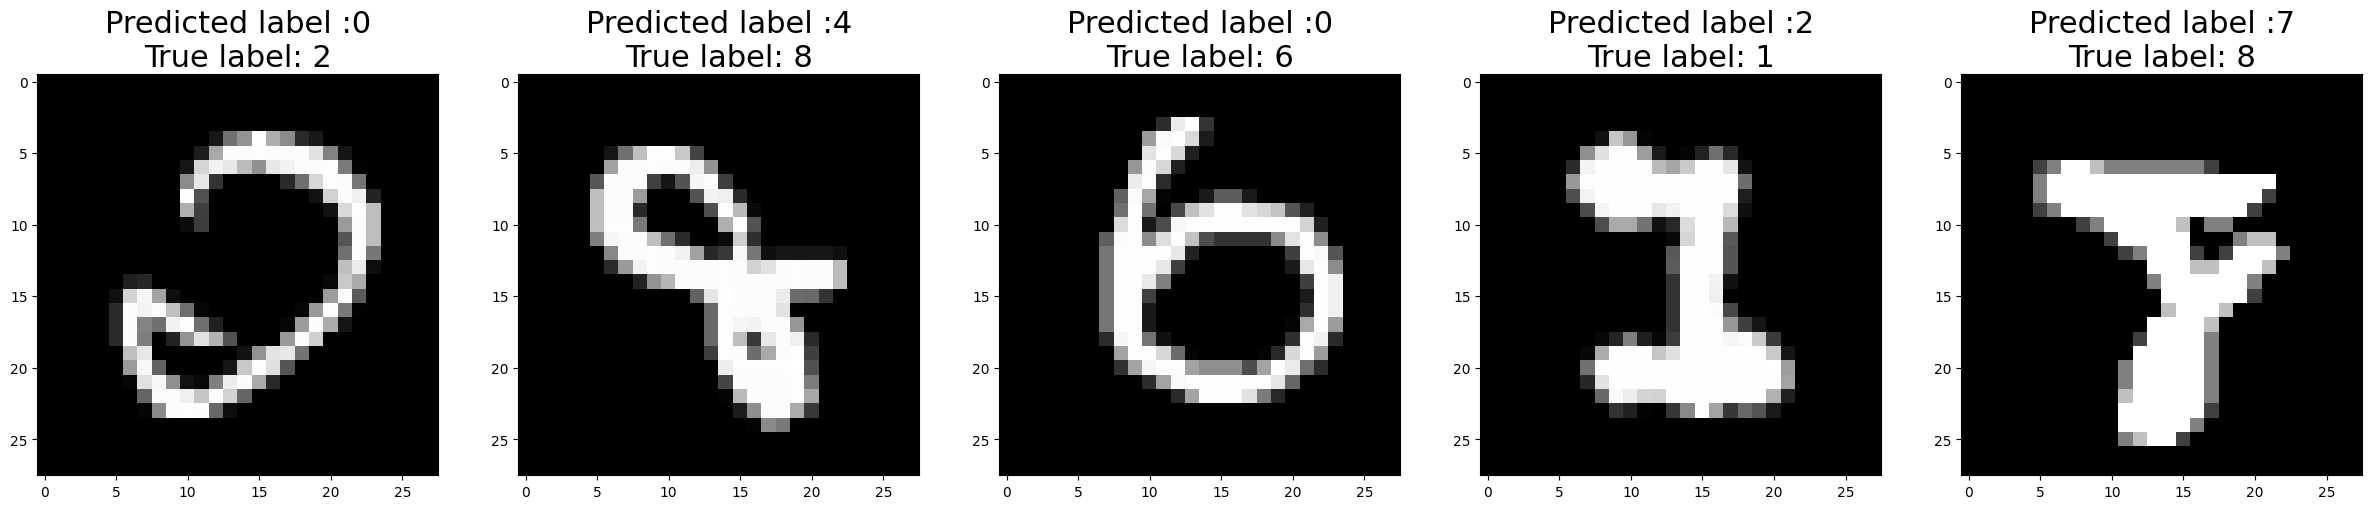

In [18]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)